In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
Data = pd.read_excel('C:\GitHubRepos\PerennialCrops\Peach\Transpiratin.xlsx')    
Data.dropna(inplace=True)

In [31]:
for i in Data.index:
    Data.loc[i,'Date'] = datetime.datetime.strptime(str(Data.loc[i,'Year'])+ ' ' +
                                                        str(Data.loc[i,'day'])+ ' ' +
                                                        str(Data.loc[i,'hhmm']).zfill(4),'%Y %j %H%M')


In [32]:
Data.set_index('Date',inplace=True)
Data.drop(columns=['day','Year','hhmm'],inplace=True)


In [33]:
Data = Data.reindex(pd.date_range(Data.index.min(),Data.index.max(),freq='30min'))

In [34]:
#Sum up complete days.  I.E dont cound days where radiation recore is incomplete
DailyData = Data.resample('D').apply(lambda x: x.sum(skipna=False))

In [35]:
DailyData.where(DailyData>0,np.nan,inplace=True)

In [36]:
DailyData.columns=['EP(mm)']

In [37]:
PET = pd.read_pickle('..\Weather\WhakatuMet.pkl').loc[:,('Date','PET')].set_index('Date').loc[DailyData.index]

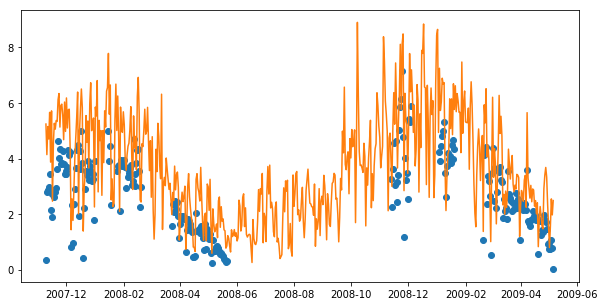

In [38]:
Figure = plt.figure(figsize=(10,5))
Ax = Figure.add_subplot(1,1,1)
plt.plot(DailyData,'o')
plt.plot(PET,'-')

Text(0.5,0,'Potential ET (mm)')

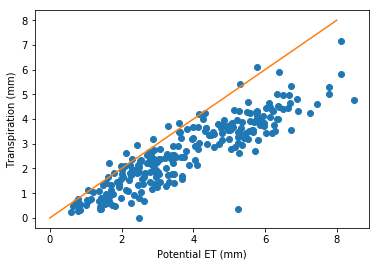

In [39]:
plt.plot(PET,DailyData,'o')
plt.plot([0,8],[0,8])
plt.ylabel('Transpiration (mm)')
plt.xlabel('Potential ET (mm)')

In [40]:
DailyData.to_pickle('Transpiration.pkl')